In [24]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\DAEM-Modified.xlsx')
s1 = wb['Darrow\'s blueberry_dead']
t = get_xcel_col(s1, 'A', 11, 57) #57
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [26]:
A1 = 4000
E1 = 60200
Y1 = .33
A2 = 11839
E2 = 75350
Y2 = 0.31

def r_m(A1,E1,Y1,A2,E2,Y2):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -((A1*np.exp(-E1/R/T[0]))+(A2*np.exp(-E2/R/T[0])))*m[0]
    dV[0] = ((Y1*A1*np.exp(-E1/R/T[0]))+(Y2*A2*np.exp(-E2/R/T[0])))*m[0]
    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1*np.exp(-E1/R/T[i]))+(A2*np.exp(-E2/R/T[i])))*m[i]
        dV[i] = ((Y1*A1*np.exp(-E1/R/T[i]))+(Y2*A2*np.exp(-E2/R/T[i])))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A1,E1,Y1,A2,E2,Y2 = X
    e1 = (r_e(V_e, t)[0] - r_m(A1,E1,Y1,A2,E2,Y2)[2])**2
    e2 = (V_e[1:57] - r_m(A1,E1,Y1,A2,E2,Y2)[1])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,E1,Y1,A2,E2,Y2))
A1,E1,Y1,A2,E2,Y2 = res.x
print(A1)
print(E1)
print(Y1)
print(A2)
print(E2)
print(Y2)

3999.999833178952
60200.00003464289
-2.095443051371965e-05
11838.999967306216
75350.00005363478
7.756298565739941e-05


In [27]:
res

      fun: 9.398463412165274
 hess_inv: array([[ 1.34896861e-01,  1.68337229e-01, -2.36791094e-06,
        -1.49750217e-01,  2.56782554e-01,  8.82920996e-06],
       [ 1.68337229e-01,  9.67244235e-01, -2.13198485e-06,
         2.91387216e-02, -4.99657008e-02,  7.93605238e-06],
       [-2.36791094e-06, -2.13198485e-06,  4.40988599e-10,
         4.11688065e-06, -4.17886781e-06, -1.64349298e-09],
       [-1.49750217e-01,  2.91387216e-02,  4.11688065e-06,
         9.74079171e-01,  4.44481487e-02, -1.53518518e-05],
       [ 2.56782554e-01, -4.99657008e-02, -4.17886781e-06,
         4.44481487e-02,  9.23782278e-01,  1.55904505e-05],
       [ 8.82920997e-06,  7.93605238e-06, -1.64349298e-09,
        -1.53518518e-05,  1.55904505e-05,  6.12537933e-09]])
      jac: array([ 2.28595734e-03, -1.02567673e-03,  3.63952930e+04, -2.08377838e-04,
        4.81724739e-04, -3.69604471e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 3
     njev: 93


In [28]:
print(r_m(A1,E1,Y1,A2,E2,Y2)[0])

[ 1.00000000e+00  9.92633455e-01  9.82606309e-01  9.69151352e-01
  9.51355371e-01  9.28166178e-01  8.98419254e-01  8.60900736e-01
  8.14450303e-01  7.58142172e-01  6.91462806e-01  6.14712170e-01
  5.29210797e-01  4.37568374e-01  3.43856004e-01  2.53342700e-01
  1.71840786e-01  1.04681011e-01  5.52512561e-02  2.38887312e-02
  7.66750038e-03  1.47058312e-03  6.20417225e-05 -8.06434452e-06
  2.64059287e-06 -1.46114329e-06  1.18449118e-06 -1.30618142e-06
  1.87217801e-06 -3.38129539e-06  7.52388640e-06 -2.02765824e-05
  6.52942099e-05 -2.48455120e-04  1.10688710e-03 -5.72891345e-03
  3.42227132e-02 -2.34518909e-01  1.83296578e+00 -1.62647626e+01
  1.63184471e+02 -1.84388272e+03  2.33938287e+04 -3.32179654e+05
  5.26379480e+06]


In [29]:
print(r_m(A1,E1,Y1,A2,E2,Y2)[3])

[-1.56734992e-04 -2.13343550e-04 -2.86275673e-04 -3.78637900e-04
 -4.93387073e-04 -6.32913270e-04 -7.98266361e-04 -9.88307077e-04
 -1.19804534e-03 -1.41870992e-03 -1.63299225e-03 -1.81917814e-03
 -1.94983880e-03 -1.99388020e-03 -1.92581498e-03 -1.73408328e-03
 -1.42893140e-03 -1.05169690e-03 -6.67287763e-04 -3.45132571e-04
 -1.31849304e-04 -2.99689658e-05 -1.49161845e-06  2.27764625e-07
 -8.72709822e-08  5.62900952e-08 -5.29930341e-08  6.76246689e-08
 -1.11776030e-07  2.32025144e-07 -5.91499337e-07  1.82065516e-06
 -6.67551766e-06  2.88370686e-05 -1.45442565e-04  8.50034609e-04
 -5.71790685e-03  4.39890360e-02 -3.85058051e-01  3.81806879e+00
 -4.27035574e+01  5.36972584e+02 -7.56539325e+03  1.19063286e+05
 -2.08671513e+06]


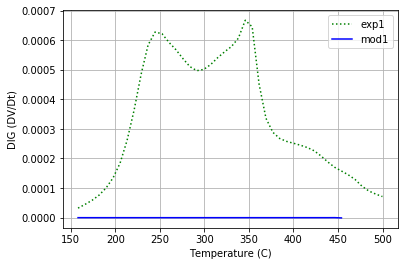

In [30]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:40],r_m(A1,E1,Y1,A2,E2,Y2)[2][0:39],color = 'blue',label='mod1')

plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

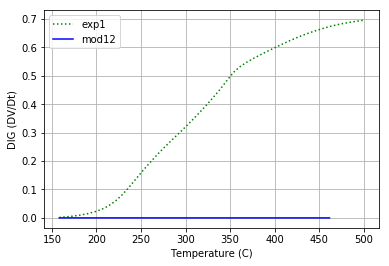

In [31]:
plt.plot(T_c[1:46],V_e[1:46],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:41],r_m(A1,E1,Y1,A2,E2,Y2)[1][0:40],color = 'blue',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()